# CLIP (Contrastive Language-Image Pre-Training) Tests

CLIP efficiently learns visual concepts from natural language supervision. CLIP can be applied to any visual classification benchmark by simply providing the names of the visual categories to be recognized, similar to the “zero-shot” capabilities of GPT-2 and GPT-3.

CLIP is a part of the DALL-E 2 Language to Image model.
- https://openai.com/dall-e-2/

- https://openai.com/blog/clip/
- https://github.com/openai/CLIP

In [1]:
!apt install gcc

ERROR: Could not find a version that satisfies the requirement gcc (from versions: none)
ERROR: No matching distribution found for gcc


In [1]:
# Get nvidia cuda version
!nvidia-smi

Mon May  2 13:35:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   38C    P8    28W / 350W |   9627MiB / 24265MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:21:00.0 Off |                  N/A |
| 30%   

In [2]:
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.4
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::charset-normalizer==2.0.11=pyhd8ed1ab_0
  - conda-forge/linux-64::python_abi==3.9=2_cp39
  - conda-forge/noarch::pycparser==2.21=pyhd8ed1ab_0
  - conda-forge/linux-64::sqlite==3.37.0=h9cd32fc_0
  - conda-forge/linux-64::cffi==1.15.0=py39h4bc2ebd_0
  - conda-forge/noarch::requests==2.27.1=pyhd8ed1ab_0
  - conda-forge/noarch::pyopenssl==22.0.0=pyhd8ed1ab_0
  - conda-forge/linux-64::pysocks==1.7.1=py39hf3d152e_4
  - conda-forge/linux-64::libmambapy==0.21.1=py39h8bfa403_0
  - conda-forge/noarch::pip==22.0.3=pyhd8ed1ab_0
  - conda-forge/linux-64::pycosat==0.6.3=py39h3811e60_1009
  - conda-forge/linux-64::cryptography==36.0.1=py39h95dcef6_0
  - conda-forge/linux-64::conda-package-handling==1.7.3=py39h3811e60_1
  - conda-forge/noarch::six==1.16.0=pyh6c4a22f_0
  - conda-forge/linux-64::conda==4.11.0=py39hf3d152e_0
  - co

done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cudatoolkit=11.4
    - pytorch=1.7.1
    - torchvision


The following packages will be UPDATED:

  sqlite                                  3.37.0-h9cd32fc_0 --> 3.38.3-h4ff8645_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-nm0jqjsd
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-nm0jqjsd
  Resolved https://github.com/openai/CLIP.git to commit b46f5ac7587d2e1862f8b7b1573179d80dcdd620
  Preparing metadata (setup.py) ... done


logits_per_image tensor([[17.4246, 19.0354, 24.7926, 21.9850, 21.8026]])
Image most likely is: 'a dog'


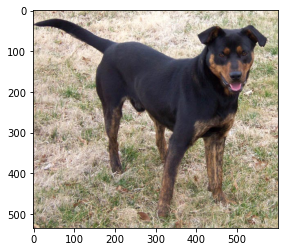

In [13]:
import torch
import clip
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

device = "cuda:2" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

title_list= ["a diagram", "a cat", "a dog", "two dogs", "one hundred dogs"]

image = preprocess(Image.open("./data/dog.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(title_list).to(device)

plt.imshow(Image.open("./data/dog.jpg"))

with torch.no_grad():
    # this will be tensor embeddings (Size([1, 512]))
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
            
    logits_per_image, logits_per_text = model(image, text)
    print(f"logits_per_image {logits_per_image}")
    probs_image = logits_per_image.softmax(dim=-1).cpu().numpy()

max_probs_index = np.argmax(probs_image[0])
print(f"Possibilities: {title_list})
print(f"Image most likely is: '{title_list[max_probs_index]}'")

In [14]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [15]:
from torchvision.datasets import CIFAR100
from random import *

# Load the model
device = "cuda:2" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Download the dataset
cifar100 = CIFAR100(root='./data', download=True, train=False)

# get random number
rng = randint(0, len(cifar100))

# Prepare the inputs
image, class_id = cifar100[rng]

# image = Image.open("snake.jpg")
# class_id = 78 # class id of snake

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

Files already downloaded and verified


Image: <PIL.Image.Image image mode=RGB size=32x32 at 0x7F197C790EE0>, image class 47, image shows a 'maple_tree'
Image input: <class 'torch.Tensor'> torch.Size([1, 3, 224, 224])
Text input: <class 'torch.Tensor'> torch.Size([100, 77])


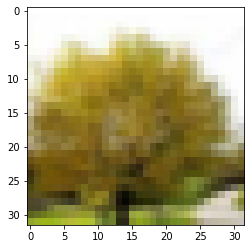

In [16]:
import matplotlib.pyplot as plt

# check images
print(f"Image: {image}, image class {class_id}, image shows a '{cifar100.classes[class_id]}'")
plt.imshow(image)
# display(image)

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

print(f"Image input: {type(image_input)} {image_input.size()}")
print(f"Text input: {type(text_inputs)} {text_inputs.size()}")

In [17]:
# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)
    
# Pick top 5 most similar labes for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

      maple_tree: 64.78%
     willow_tree: 13.59%
        oak_tree: 12.22%
       pine_tree: 3.52%
      lawn_mower: 2.46%


## Test normalization stuff

### No norm, no mean

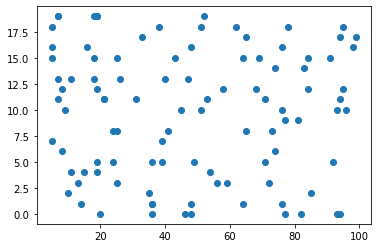

In [55]:
import matplotlib.pyplot as plt
 
X = np.random.randint(low=(0, 0), high=(100, 20), size=(100, 2))

x1, x2 = X[:, 0], X[:, 1]

plt.scatter(x1, x2)

### Mean:

[[47.56  9.67]]


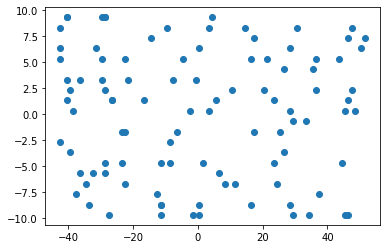

In [60]:
mean = np.mean(X, axis=0, keepdims=True)

Xmean = X - mean

x1mean, x2mean = Xmean[:, 0], Xmean[:, 1]

plt.scatter(x1mean, x2mean)

### Norm

[[558.77186758 114.09206809]]


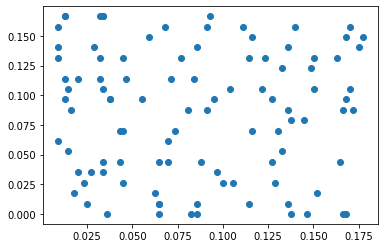

In [67]:
norm = np.linalg.norm(X, axis=0, keepdims=True)
print(norm)

Xnorm = X / norm

x1norm, x2norm = Xnorm[:, 0], Xnorm[:, 1]

plt.scatter(x1norm, x2norm)

### Norm and mean

[[47.56  9.67]]
[[293.30980209  60.54841038]]


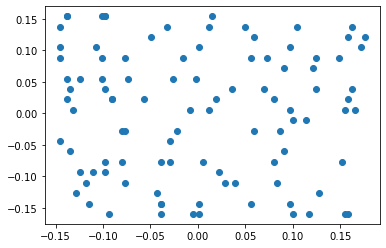

In [64]:
mean = np.mean(X, axis=0, keepdims=True)
print(mean)

Xmean = X - mean

norm = np.linalg.norm(Xmean, axis=0, keepdims=True)
print(norm)

Xmean_norm = Xmean / norm

x1mean_norm, x2mean_norm = Xmean_norm[:, 0], Xmean_norm[:, 1]

plt.scatter(x1mean_norm, x2mean_norm)

## Conclusion

Normalized inputs help to "create a symetrical cost function" in order to help gradient descent to find the minimum faster/easier and optimize graient descent.